<a href="https://colab.research.google.com/github/Aras1703/LSTM-Clickbait_Classifier/blob/main/NLP_Clickbait_Classifier_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('clickbait_data.csv')

In [ ]:
df = df.iloc[8000:24000, :]

In [ ]:
df.shape

(16000, 2)

In [ ]:
df.head()

,headline,clickbait
8000,Here's Why Ciara's Post-Baby Style Is Dope AF,1
8001,12 Aussies Reveal What They Love And Hate Abou...,1
8002,19 Stealthy Products That'll Protect All Your ...,1
8003,"The Fan Art For ""Star Wars: The Force Awakens""...",1
8004,Are You More Of An Old Or Young Soul Based On ...,1


In [ ]:
df.tail()

,headline,clickbait
23995,"Circus elephant escapes in Zurich, Switzerland",0
23996,"Bush backtracks over legal status of alleged ""...",0
23997,Synchronised bombings strike Indian state of A...,0
23998,U.S. Agencies Advised to Release Information t...,0
23999,"Euro, Once a Boon, Is Now a Burden for Some",0


In [ ]:
print((df.clickbait == 1).sum())
print((df.clickbait == 0).sum())

7999
8001


In [ ]:
headline = df['headline'].values
label = df[['clickbait']].values

In [ ]:
from sklearn.model_selection import train_test_split
headline_train, headline_test, label_train, label_test = train_test_split(headline, label, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
embedding_dim = 16
max_length = 120

tokenizer = Tokenizer(num_words=vocab_size, oov_token='x')

tokenizer.fit_on_texts(headline_train)
word_index = tokenizer.word_index
sequence_train = tokenizer.texts_to_sequences(headline_train)
padded_train = pad_sequences(sequence_train, maxlen = max_length)

sequence_test = tokenizer.texts_to_sequences(headline_test)
padded_test = pad_sequences(sequence_test, maxlen = max_length)

In [ ]:
padded_train[8000]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0, 3316,    2, 1325,    5,    4, 3463,  727,    3,  377],
      dtype=int32)

In [ ]:
import tensorflow as tf
from keras import regularizers

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(8),
    tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(padded_train,
                    label_train,
                    epochs=10, 
                    validation_data=(padded_test, label_test),
                    verbose=2)

Epoch 1/10
400/400 - 13s - loss: 0.4255 - accuracy: 0.8648 - val_loss: 0.1711 - val_accuracy: 0.9663 - 13s/epoch - 34ms/step
Epoch 2/10
400/400 - 11s - loss: 0.1581 - accuracy: 0.9648 - val_loss: 0.1333 - val_accuracy: 0.9719 - 11s/epoch - 28ms/step
Epoch 3/10
400/400 - 10s - loss: 0.1095 - accuracy: 0.9727 - val_loss: 0.1198 - val_accuracy: 0.9737 - 10s/epoch - 26ms/step
Epoch 4/10
400/400 - 11s - loss: 0.0845 - accuracy: 0.9787 - val_loss: 0.1203 - val_accuracy: 0.9719 - 11s/epoch - 28ms/step
Epoch 5/10
400/400 - 11s - loss: 0.0724 - accuracy: 0.9764 - val_loss: 0.1256 - val_accuracy: 0.9716 - 11s/epoch - 26ms/step
Epoch 6/10
400/400 - 11s - loss: 0.0637 - accuracy: 0.9768 - val_loss: 0.1434 - val_accuracy: 0.9675 - 11s/epoch - 28ms/step
Epoch 7/10
400/400 - 11s - loss: 0.0578 - accuracy: 0.9774 - val_loss: 0.1308 - val_accuracy: 0.9712 - 11s/epoch - 28ms/step
Epoch 8/10
400/400 - 11s - loss: 0.0536 - accuracy: 0.9766 - val_loss: 0.1481 - val_accuracy: 0.9678 - 11s/epoch - 28ms/step


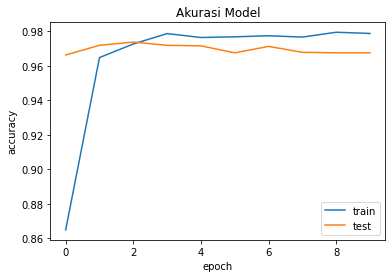

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

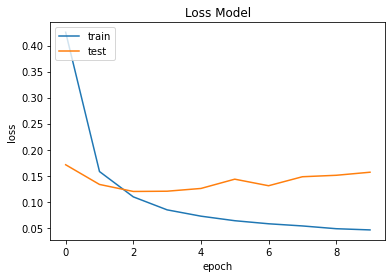

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(padded_test, label_test)

100/100 [==============================] - 1s 8ms/step - loss: 0.1568 - accuracy: 0.9675


[0.1567768156528473, 0.9674999713897705]